In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
place = 'Grad_Jablje'  # 'Grad_Jablje' or 'Aarhus' or 'Den_Helder'
filename = 'data_' + place + '_array.json' 
file = open('C:/Users/Matej/ijs/PerceptiveSentinel/Utilities/DarkSkyGrabber/data/' + filename,'r')
json_text = file.read()
file.close()

In [3]:
data_list = json.JSONDecoder().decode(json_text)

In [4]:
df0 = pd.DataFrame(data_list);
pd.set_option('display.max_columns', 500)
df0[:5]

,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,cloudCover,cloudCoverError,dewPoint,humidity,icon,moonPhase,ozone,precipAccumulation,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,pressure,pressureError,summary,sunriseTime,sunsetTime,temperatureHigh,temperatureHighError,temperatureHighTime,temperatureLow,temperatureLowTime,temperatureMax,temperatureMaxError,temperatureMaxTime,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windBearingError,windGust,windGustTime,windSpeed,windSpeedError
0,1.58,1451656800,-6.54,1451707200,1.58,1451656800,-4.92,1451685600,0.62,NaN,-5.89,0.78,partly-cloudy-day,0.73,NaN,NaN,0.0000,0.0000,NaN,0.00,NaN,1028.83,NaN,Mostly cloudy until evening.,1451630728,1451662023,1.58,NaN,1451656800,-6.54,1451707200,1.58,NaN,1451656800,-4.92,1451685600,1451602800,NaN,NaN,9.50,197,NaN,0.78,1.451650e+09,0.00,NaN
1,-0.93,1451743200,-4.11,1451804400,-0.93,1451743200,-6.54,1451707200,0.70,NaN,-5.06,0.88,fog,0.76,NaN,0.224,0.0102,0.0711,1.451772e+09,0.11,snow,1023.07,NaN,Foggy starting in the evening.,1451717129,1451748478,-0.93,NaN,1451743200,-4.11,1451804400,-0.93,NaN,1451743200,-6.54,1451707200,1451689200,NaN,NaN,4.80,42,NaN,0.59,1.451740e+09,0.07,NaN
2,-2.32,1451818800,-6.16,1451883600,-1.64,1451775600,-5.11,1451858400,0.98,NaN,-5.44,0.86,fog,0.79,NaN,1.191,0.0432,0.1778,1.451830e+09,0.38,snow,1016.46,NaN,Foggy in the morning.,1451803527,1451834934,-2.32,NaN,1451818800,-6.16,1451883600,-1.64,NaN,1451775600,-5.11,1451858400,1451775600,NaN,NaN,5.13,106,NaN,1.85,1.451833e+09,0.72,NaN
3,-3.95,1451908800,-5.21,1451952000,-3.95,1451908800,-6.16,1451883600,0.95,NaN,-7.32,0.85,fog,0.82,NaN,0.279,0.0076,0.0381,1.451902e+09,0.10,snow,1004.35,NaN,Foggy in the evening.,1451889922,1451921393,-3.95,NaN,1451908800,-5.21,1451952000,-3.95,NaN,1451908800,-6.16,1451883600,1451862000,NaN,NaN,5.21,125,NaN,1.27,1.451869e+09,0.21,NaN
4,-0.81,1452016800,-0.86,1452020400,-0.69,1452031200,-5.21,1451952000,0.99,NaN,-4.37,0.89,fog,0.85,NaN,0.351,0.0254,0.1524,1.452020e+09,0.22,snow,1003.67,NaN,Foggy starting in the evening.,1451976315,1452007854,-0.81,NaN,1452016800,-0.86,1452020400,-0.69,NaN,1452031200,-5.21,1451952000,1451948400,NaN,NaN,3.96,243,NaN,0.98,1.451999e+09,0.04,NaN


In [5]:
df0 = pd.DataFrame(data_list);
drop = [ 'apparentTemperatureHigh',
         'apparentTemperatureLow',
        'apparentTemperatureHighTime',
        'apparentTemperatureLowTime',
        'apparentTemperatureMax',
        'apparentTemperatureMaxTime',
        'apparentTemperatureMin',
        'apparentTemperatureMinTime',
        'cloudCoverError',
        'icon',
        'ozone',
        'precipIntensityMaxTime',
        'pressureError',
        'summary',
        'temperatureMaxError',
        'uvIndexTime',
        'visibility',
        'windBearing',
        'windGust',
        'windGustTime',
        'precipType',
        'moonPhase',
        'sunriseTime',
        'sunsetTime',
        'temperatureHighTime',
        'temperatureLowTime',
        'temperatureMaxTime',
        'temperatureMinTime',
        'temperatureMax',
        'temperatureMin',
        'precipAccumulation',
        'uvIndex',
       ]
data_list = [
        'cloudCover',
        'dewPoint',
        'humidity',
        'precipIntensity',
        'precipIntensityMax',
        'precipProbability',
        'pressure',
        'temperatureHigh',
        'temperatureLow',
        'windSpeed'
        ]

df0['time'] = pd.to_datetime(df0['time'] + 2*60*60,unit='s').dt.round('1d');
df = df0.set_index('time').loc[:, data_list]
#df = df0.drop(drop,1).set_index('time');

In [6]:
columns_order = [ 'cloudCover',
 'humidity',
 'precipIntensity',
 'precipIntensityMax',
 'precipProbability',
 'windSpeed',
 'pressure',
 'dewPoint',
 'temperatureHigh',
 'temperatureLow',
]
df = df[columns_order]

In [14]:
pd.set_option('display.max_columns', 500)
df[:100]

,cloudCover,humidity,precipIntensity,precipIntensityMax,precipProbability,windSpeed,pressure,dewPoint,temperatureHigh,temperatureLow
time,,,,,,,,,,
2016-01-01,0.62,0.78,0.0000,0.0000,0.00,0.00,1028.83,-5.89,1.58,-6.54
2016-01-02,0.70,0.88,0.0102,0.0711,0.11,0.07,1023.07,-5.06,-0.93,-4.11
2016-01-03,0.98,0.86,0.0432,0.1778,0.38,0.72,1016.46,-5.44,-2.32,-6.16
2016-01-04,0.95,0.85,0.0076,0.0381,0.10,0.21,1004.35,-7.32,-3.95,-5.21
2016-01-05,0.99,0.89,0.0254,0.1524,0.22,0.04,1003.67,-4.37,-0.81,-0.86
2016-01-06,0.99,0.92,0.0229,0.0940,0.51,0.05,1003.36,-1.18,0.96,-1.98
2016-01-07,0.97,0.92,0.0178,0.1753,0.41,0.18,1005.39,-2.18,0.23,-4.12
2016-01-08,0.81,0.92,0.1143,0.5613,0.64,0.06,1011.12,-2.27,1.46,0.69
2016-01-09,0.98,0.94,0.3277,0.7950,0.64,0.05,1008.45,0.94,3.38,2.13


In [8]:
df.describe()

,cloudCover,humidity,precipIntensity,precipIntensityMax,precipProbability,windSpeed,pressure,dewPoint,temperatureHigh,temperatureLow
count,946.000000,946.000000,902.000000,902.000000,902.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,0.609154,0.760909,0.122260,0.670002,0.269191,0.391342,1017.378594,6.484006,16.203256,6.794662
std,0.242452,0.102145,0.235143,1.267914,0.263399,0.356038,7.455732,7.385102,9.763931,7.277561
min,0.080000,0.310000,0.000000,0.000000,0.000000,0.000000,992.790000,-18.710000,-6.330000,-14.960000
25%,0.420000,0.682500,0.000000,0.010200,0.000000,0.130000,1013.252500,0.892500,8.292500,0.975000
50%,0.630000,0.760000,0.015200,0.142200,0.210000,0.290000,1016.585000,6.995000,16.785000,7.240000
75%,0.810000,0.840000,0.142200,0.790600,0.540000,0.510000,1021.257500,12.795000,24.510000,12.910000
max,1.000000,0.950000,2.085300,12.148800,0.950000,2.440000,1041.060000,19.390000,36.880000,21.720000


In [9]:
list_of_names = df.columns.tolist()

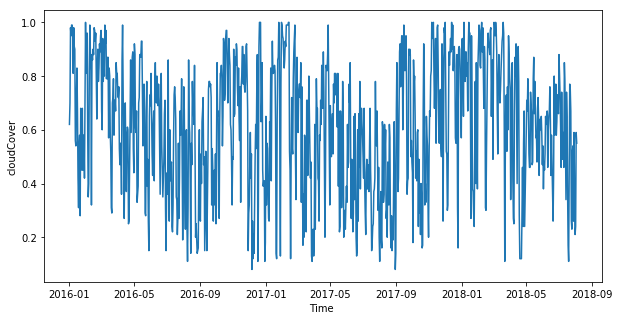

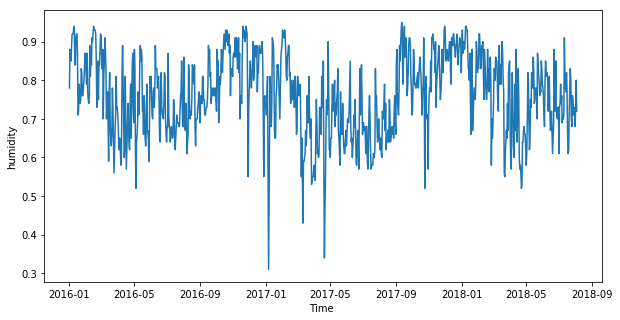

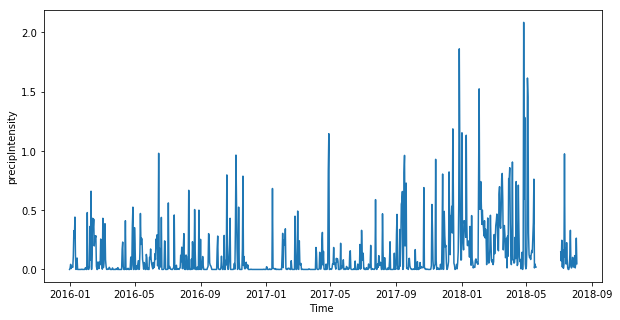

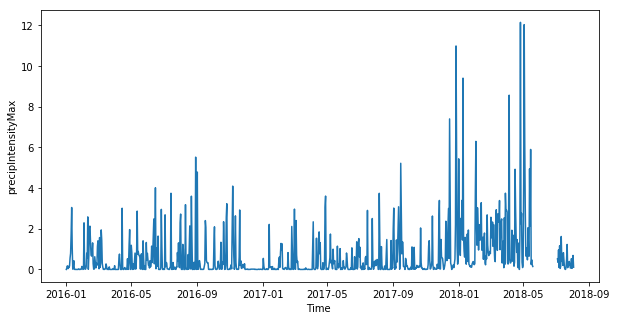

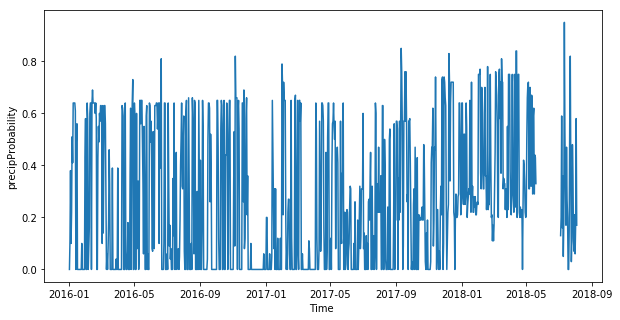

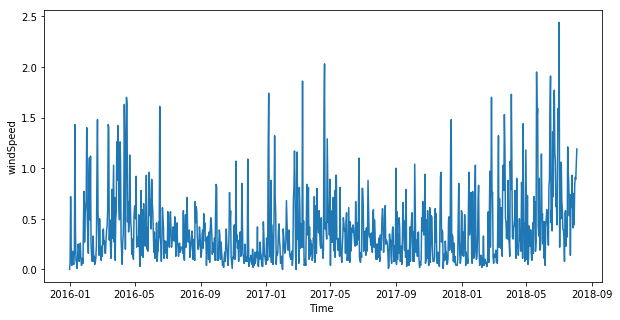

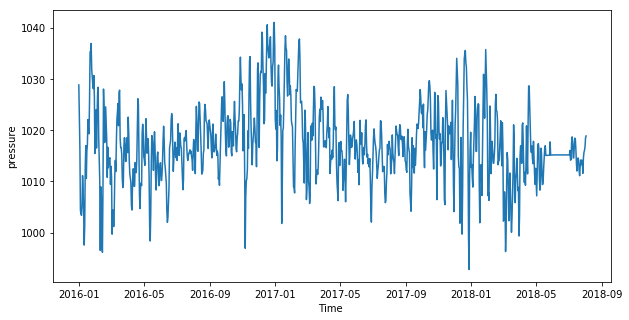

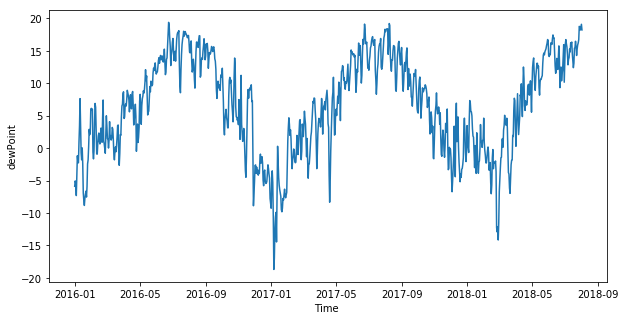

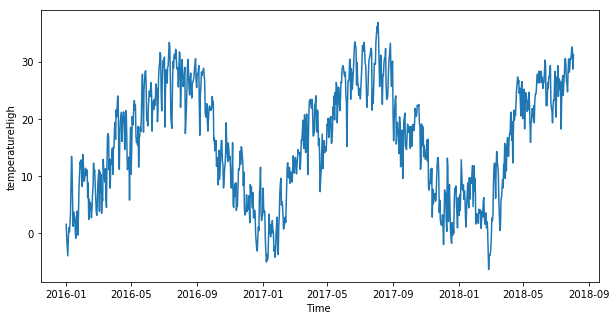

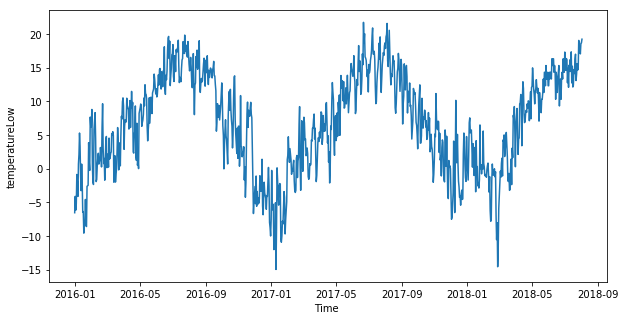

In [10]:
for i in list_of_names:
    fig, ax = plt.subplots();
    fig.set_size_inches(10, 5)
    ax.plot(df.index, df[i])
    
    plt.xlabel('Time ')
    plt.ylabel(i)
    plt.show();
    
    #fig.savefig('./graphs/' + place + '_' + i + '.png', dpi=300)

In [11]:
df.corr()

,cloudCover,humidity,precipIntensity,precipIntensityMax,precipProbability,windSpeed,pressure,dewPoint,temperatureHigh,temperatureLow
cloudCover,1.000000,0.652758,0.408500,0.340042,0.578838,-0.001307,-0.310680,-0.186603,-0.517363,-0.219137
humidity,0.652758,1.000000,0.369275,0.276002,0.503444,-0.357756,-0.070566,-0.141858,-0.507761,-0.248618
precipIntensity,0.408500,0.369275,1.000000,0.898021,0.626010,-0.029738,-0.401078,0.030168,-0.165658,-0.037246
precipIntensityMax,0.340042,0.276002,0.898021,1.000000,0.582363,-0.005962,-0.366394,0.072355,-0.088315,0.009794
precipProbability,0.578838,0.503444,0.626010,0.582363,1.000000,-0.073943,-0.484721,0.112726,-0.160759,0.030072
windSpeed,-0.001307,-0.357756,-0.029738,-0.005962,-0.073943,1.000000,-0.184594,0.093588,0.147758,0.142235
pressure,-0.310680,-0.070566,-0.401078,-0.366394,-0.484721,-0.184594,1.000000,-0.348661,-0.215030,-0.334565
dewPoint,-0.186603,-0.141858,0.030168,0.072355,0.112726,0.093588,-0.348661,1.000000,0.902341,0.952002
temperatureHigh,-0.517363,-0.507761,-0.165658,-0.088315,-0.160759,0.147758,-0.215030,0.902341,1.000000,0.899969
temperatureLow,-0.219137,-0.248618,-0.037246,0.009794,0.030072,0.142235,-0.334565,0.952002,0.899969,1.000000


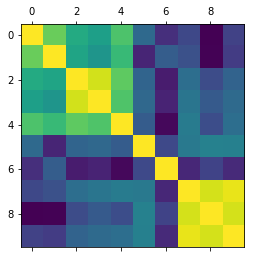

In [12]:
plt.matshow(df.corr())
plt.show()

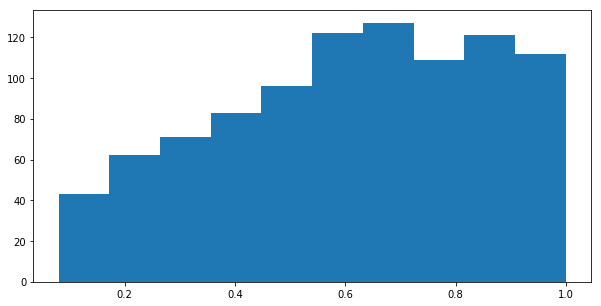

In [13]:
fig, ax = plt.subplots();
#ax.set_ylim(-0.2, 1)
fig.set_size_inches(10, 5)
plt.hist(df['cloudCover'],10, alpha=1, density=False)
plt.show()